In [1]:
%pip install osrsbox

Note: you may need to restart the kernel to use updated packages.


In [300]:
from osrsbox import items_api
from osrsbox.items_api.item_properties import ItemProperties
import random
from dataclasses import dataclass
import math
from ipywidgets.widgets import Box, VBox, HBox, Layout, Image, GridBox, Label
from IPython.display import display
from typing import Dict, Any
from base64 import b64decode
import numpy as np

In [3]:
items = items_api.load()

In [18]:
all_gear = [item for item in items if item.equipment is not None]

In [20]:
all_gear[0]

ItemProperties(id=35, name='Excalibur', last_updated='2021-08-05', incomplete=False, members=True, tradeable=False, tradeable_on_ge=False, stackable=False, stacked=None, noted=False, noteable=False, linked_id_item=None, linked_id_noted=None, linked_id_placeholder=16525, placeholder=False, equipable=True, equipable_by_player=True, equipable_weapon=True, cost=200, lowalch=80, highalch=120, weight=2.267, buy_limit=None, quest_item=True, release_date='2002-02-27', duplicate=False, examine='This used to belong to King Arthur.', icon='iVBORw0KGgoAAAANSUhEUgAAACQAAAAgCAYAAAB6kdqOAAABlElEQVR4XuWV/UoCQRTFvW/iI/QCgiEhYX8kSGKSRJJImmRmZppsREb0oYlfKRFR73ni3m3WacH+c2ahA5eFYZb9cc6Z2VDof4jgX7EowufrFAGBInxMJngbDgVoLRy2CUWYvfQFSMFYBCJM+z18zWfBcYdB3sdjGctAi6gCAORGxRAKyHJ/3KgYRo11d3QY60DzwSAoQITx89PSuKwAcVzskP9kWYBhLQfy7zQgwujxQSLj+0e/mQ0C8Z9b/b1dIHaIgdglw+4Q2vU6Oo3GD5RbaAVkxZ2z4zLurx35uIqLgdSaQRgW4c7peO4oIJ5FlHqkKxfhKJ/H+UnFA+JRkLdXbYmUXTQERdiKx7GTTOIgm0WlWPQcuWm1cFmrCbDqmKH4SPrCrrAjmVRKYE5LJezvZuSpYAwAu

In [33]:
# all_slots = set()
# for item in all_gear:
#     all_slots.add(item.equipment.slot)
# print(all_slots)
all_slots = set(item.equipment.slot for item in all_gear)
print(all_slots)

{'ring', 'head', 'body', 'feet', 'legs', '2h', 'neck', 'ammo', 'weapon', 'hands', 'shield', 'cape'}


In [62]:
def item_by_name(name: str) -> ItemProperties:
    if name.lower() not in set(item.name.lower() for item in all_gear):
        raise ValueError("not valid name")
    for item in all_gear:
        if item.name.lower() == name.lower():
            return item

In [380]:
def is_cosmetic(item: ItemProperties) -> bool:
    not_cos_flag = False
    useful_equipment_stats = {"attack_stab", "attack_slash", "attack_crush", "attack_magic", "attack_ranged", "defence_stab", "defence_slash", "defence_crush", "defence_magic", "defence_ranged", "melee_strength", "ranged_strength", "magic_damage"}
    for stat in useful_equipment_stats:
        if getattr(item.equipment, stat) != 0:
            not_cos_flag = True
    if not_cos_flag == True:
        return False
    else:
        return True

In [186]:
item_by_name("Dragon platebody")

ItemProperties(id=21892, name='Dragon platebody', last_updated='2021-08-05', incomplete=False, members=True, tradeable=True, tradeable_on_ge=True, stackable=False, stacked=None, noted=False, noteable=True, linked_id_item=None, linked_id_noted=21893, linked_id_placeholder=21894, placeholder=False, equipable=True, equipable_by_player=True, equipable_weapon=False, cost=2000000, lowalch=800000, highalch=1200000, weight=11.339, buy_limit=70, quest_item=False, release_date='2018-01-04', duplicate=False, examine='Provides excellent protection.', icon='iVBORw0KGgoAAAANSUhEUgAAACQAAAAgCAYAAAB6kdqOAAACqklEQVR4Xu2WLY8UQRCGZ/7BqjVnNkFssgqDRCJIECQoBAaDwSAQJ0hOIMgFQYLjzw7zTM+zU1vbNx/kFLlKKrPTH1VPv91ds03zZE/2/1rb5ZbJ6Jvrj7Y0dq7vbG13f/97DHTtr3ZN97L35WBl7Klx7LXf3t6tiNMPeLdvBv+w33XvR7ftzZhkLpHO2Bfj2Oz0Acy454fDHFTbfbzZdZ965wlUBotJaDO47SjIb9pUlHedMTxVehHo62E3uFAZzKAqJpCJfUbYDCb4CiCs398e6EsP8nlUSziCEIz3vJUZigXQVoMWagVQgbl7th9UEkowD6qKCat6wJHUxALjAtm3GejboUBFMIOgVlavBkUb6mQVVXoBqB0gAPreAwHFb5yEJGMMAIebm7OrI

In [72]:
is_cosmetic(item_by_name("Dragon SWord"))

False

In [81]:
def get_random_item_for_slot(slot: str, exclude_cosmetics: bool = True, only_tradables: bool = True) ->  ItemProperties:
    if slot not in all_slots:
        raise ValueError("slot name not found")
    all_in_chosen_slot = [item for item in all_gear if item.equipment.slot == slot]
    if exclude_cosmetics:
        all_in_chosen_slot = [item for item in all_in_chosen_slot if not is_cosmetic(item)]
    if only_tradables:
        all_in_chosen_slot = [item for item in all_in_chosen_slot if item.tradeable_on_ge]
    return random.choice(all_in_chosen_slot)

In [77]:
get_random_item_for_slot("legs")

ItemProperties(id=10067, name='Polar camo legs', last_updated='2021-08-05', incomplete=False, members=True, tradeable=True, tradeable_on_ge=True, stackable=False, stacked=None, noted=False, noteable=True, linked_id_item=None, linked_id_noted=10068, linked_id_placeholder=15381, placeholder=False, equipable=True, equipable_by_player=True, equipable_weapon=False, cost=20, lowalch=8, highalch=12, weight=0.226, buy_limit=150, quest_item=False, release_date='2006-11-21', duplicate=False, examine='These should make me harder to spot in polar areas.', icon='iVBORw0KGgoAAAANSUhEUgAAACQAAAAgCAYAAAB6kdqOAAACRElEQVR4Xu2W4VLTQBDHyZvwCL6no37RyoAKNNDaUmibtpSSZEothWlxHNQPPs7K745NMpCoM/ROP7gzO83c3XR/2f3vXjY2/psTC6TavVke9PnLN/K69l5qW7uytRPK9rsDiZNLmc6ufUEF8nZ7X8LmiTTafTlo9ow3PvalF8UyGk9lcJoa5+yzzU2XUIF0++fGCa4+GKUGpAjUG8R+gMaTmaTTK5nEcxv8Dub07MKsAwQsQMe9Mz9AyXRhNAIQIDjPrBWBOt2xH6A4tTAAaGaSdGGypkB4qzOUvbDtWtiBTJK5gcAB0o66+LTMNAVQ+3gk9cOOnyyhnWJ2ZvOVXF59lmiYZFBoiE70AgSIagggQFjnV6G60bkZC16AKBMgCqQdReYUqnMy

In [91]:
basic_randomizer_roll = [get_random_item_for_slot(slot) for slot in all_slots]

In [109]:
rand_gear = {}
for slot in all_slots:
    rand_gear[slot] = next(item for item in basic_randomizer_roll if item.equipment.slot == slot)

In [129]:
def reroll(gearsetup: dict, slot: str, exclude_cosmetics: bool = True, only_tradables: bool = True) -> dict:
    new_setup = gearsetup.copy()
    new_item = get_random_item_for_slot(slot, exclude_cosmetics = exclude_cosmetics, only_tradables = only_tradables)
    new_setup[slot] = new_item
    return new_setup

In [130]:
for k,v in rand_gear.items():
    print(v.name)

Ring of the gods
Turquoise hat
Pink robe top
Swampbark boots
Bronze plateskirt
Guthan's warspear
Lovakengj scarf
Iron arrow(p++)
Black dart
Leather vambraces
Granite shield
Pink cape


In [132]:
rerolled_gear = reroll(rand_gear, "head")
for k,v in rerolled_gear.items():
    print(v.name)

Ring of the gods
Proselyte sallet
Pink robe top
Swampbark boots
Bronze plateskirt
Guthan's warspear
Lovakengj scarf
Iron arrow(p++)
Black dart
Leather vambraces
Granite shield
Pink cape


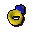

ring


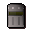

head


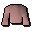

body


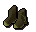

feet


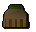

legs


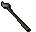

2h


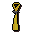

neck


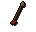

ammo


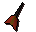

weapon


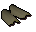

hands


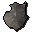

shield


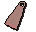

cape


In [98]:
for item in basic_randomizer_roll:
    display.display(display.Image(b64decode(item.icon)))
    print(item.equipment.slot)

In [291]:
# Create image widgets and set empty ones as blank spaces
def display_setup(gear_setup: Dict[str, Any]):
  image_slots = [None, "head", None, "cape", "neck", "ammo", "weapon", "body", "shield", None, "legs", None, "hands", "feet", "ring"]
  image_widgets = []
  label_widgets = []
  for slot in image_slots:
    if slot is None or slot not in gear_setup or gear_setup[slot] is None:
      image_widgets.append(Box(layout=Layout(width='48px', height='48px')))
    else:
      image_widgets.append(Image(value=b64decode(gear_setup[slot].icon)))#
      label_widgets.append(Label(value=gear_setup[slot].name, padding="0px"))


  # Create a grid layout
  grid = GridBox(image_widgets, layout=Layout(
      grid_template_columns='repeat(3, 48px)',
      grid_template_rows='repeat(5, 48px)',
  ))
  labels = VBox(label_widgets)
  gear_display = HBox([grid, labels])

  display(gear_display)

In [292]:
display_setup(rerolled_gear)

In [317]:
def assign_quality(item: ItemProperties, str_scaling=25, att_scaling=5, tank_scaling=1) -> float:
    isweapon = item.weapon is not None
    att_stats = {"attack_stab", "attack_slash", "attack_crush", "attack_magic", "attack_ranged"}
    str_stats = {"melee_strength", "ranged_strength", "magic_damage"}
    highest_att_stat = max(getattr(item.equipment, stat) for stat in att_stats)
    highest_str_stat = max(getattr(item.equipment, stat) for stat in str_stats)
    # print(highest_str_stat)
    if isweapon:
        quality = math.pow(highest_att_stat+65, 0.5)*(highest_str_stat+40)/item.weapon.attack_speed
    else:
        melee_defs = {"defence_stab", "defence_slash", "defence_crush"}
        avg_melee_def = sum([getattr(item.equipment, stat) for stat in melee_defs])/len(melee_defs)
        range_def = item.equipment.defence_ranged
        mage_def = item.equipment.defence_magic
        quality = tank_scaling*sum([avg_melee_def, range_def, mage_def]) + str_scaling*highest_str_stat + att_scaling*highest_att_stat
    return quality

In [347]:
from functools import lru_cache

In [373]:
tradable_items = [item for item in all_gear if item.tradeable_on_ge]
tradable_items = [item for item in tradable_items if not is_cosmetic(item)]
no_cos_items = [item for item in all_gear if not is_cosmetic(item)]

In [370]:
def roll_crate(crate_score: float, number_of_rolls: int, items_list, debug=False):
    if crate_score > 1 or crate_score < 0:
        raise ValueError("crate_score should be between 0 and 1")
    def calc_weight(crate_score: float, quality_ratio: float) -> float:
        power = 2
        if quality_ratio == crate_score:
            return math.pow(20, power)
        return min(math.pow(abs(quality_ratio-crate_score), -power), 20)
    rolled_items = []
    all_slots = ['ring', 'head', 'body', 'feet', 'legs', '2h', 'neck', 'ammo', 'weapon', 'hands', 'shield', 'cape']
    max_quality_list = []
    for roll in range(number_of_rolls):
        chosen_slot = random.choice(all_slots)
        valid_item_list = []
        item_quality_list = []
        for item in items_list:
            if item.equipment.slot == chosen_slot:
                valid_item_list.append(item)
                item_quality_list.append(assign_quality(item))
        max_quality = max(item_quality_list)
        max_quality_list.append(max_quality)
        item_weight_list = [calc_weight(crate_score, quality/max_quality) for quality in item_quality_list]
        # print(valid_item_list)
        total_weight = np.sum(item_weight_list)
        normalised_weight_list = [weight/total_weight for weight in item_weight_list]
        rolled_items.append(np.random.choice(valid_item_list, p=normalised_weight_list))
    if debug:
        return rolled_items, max_quality_list
    return rolled_items


In [382]:
crate_weighting = 1
crate, max_list = roll_crate(crate_weighting, 500, no_cos_items, debug=True)
items_stats = []
for index, item in enumerate(crate):
    items_stats.append((item.name, assign_quality(item), max_list[index], assign_quality(item)/max_list[index]))
print(sorted(items_stats, key=lambda s: s[-1], reverse=True))

[('Dragon javelin', 3750.0, 3750.0, 1.0), ('Corrupted helm (perfected)', 254.0, 254.0, 1.0), ('Infernal cape (l)', 256.0, 256.0, 1.0), ('Crystal halberd (perfected)', 676.3414448338946, 676.3414448338946, 1.0), ('Berserker ring (i)', 202.66666666666666, 202.66666666666666, 1.0), ('Primordial boots', 157.0, 157.0, 1.0), ('Amulet of torture (or)', 325.0, 325.0, 1.0), ('Infernal cape', 256.0, 256.0, 1.0), ('Ferocious gloves', 430.0, 430.0, 1.0), ('Primordial boots', 157.0, 157.0, 1.0), ('Amulet of torture (or)', 325.0, 325.0, 1.0), ('Infernal cape (l)', 256.0, 256.0, 1.0), ('Crystal halberd (perfected)', 676.3414448338946, 676.3414448338946, 1.0), ('Ferocious gloves', 430.0, 430.0, 1.0), ('Twisted buckler', 446.6666666666667, 446.6666666666667, 1.0), ('Primordial boots', 157.0, 157.0, 1.0), ('Twisted buckler', 446.6666666666667, 446.6666666666667, 1.0), ('Infernal cape', 256.0, 256.0, 1.0), ('Corrupted legs (perfected)', 346.0, 346.0, 1.0), ('Primordial boots', 157.0, 157.0, 1.0), ('Feroc